# Warm-up

Reminder: the point of this series of notebooks is to build out a stable diffusion AI using only 

- Python
- matplotlib
- The Python standard library
- Jupyter notebooks and nbdev

Ok! First thing's first, I believe we need to make a matrix class. 

In [1]:
class Matrix(): 
    def __init__(self):
        pass

Ok! I made the most useless class in the world and originally I forgot the "def" in front of the \_\_init__ class. *facepalm* I'm learning. 

There was more to do here. I created the class because I needed a certain kind of functionality. What was that functionality and what was the dunder function that allowed me to access it? __get__ ? 

I think I want something like this:

For conventional arrays you can index into elements like so: 

In [2]:
a = [[1,2,3], [4,5,6], [7,8,9]]
o = a[0][1]
o

2

But we want to be able to index into them using tuples, like tensors do 

In [3]:
# returns undefined if it doesn't work
try: 
    o = a[0,1]
except: 
    o = 'undefined'
o 

'undefined'

In [4]:
# example of needed functionality with tensors 
import torch 
from torch import tensor
tns = tensor(a)
o = tns[0,1]
o

tensor(2)

That's the functionality we need if I'm remembering lessons 10-11 correctly. How do we do this with our matrix class? I'm feeling a little bit stuck, so let's keep experimenting. 

My first thought is to poke around the matrix class right now and see what it does. Does it need any kind of inheritance? 

What is the desiderata -- we want to basically transform a tuple into brackets. Not hard. I'm going to take a look back at the original. 

In [5]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

This is what was written in the original notebook. Can I grok it? 

It initializes with parameters self, and xs. Type(xs) is not defined. 
The dunder I was looking for was "\_\_getitem__". It has parameters self, idxs. It transforms the indexes into the proper form. 

I'm suprised by how brittle this is. __It'll only work for 2 dim tensors.__ You have to pass a list with exactly two elements. 

Also, do you need parantheses when you declare the class up top? 

In [6]:
mat = Matrix(a)

In [7]:
o_new = mat[0,1]
o_new

2

It works! On this at least. I want to know more about \_\_getitem__

Initial description: \_\_getitem__ is a magic method that allows instances of a class that uses it to perform indexer operation (i.e. using []). Basically it defines the behavior of code in the pattern "self[key]"

I'm not quite satisfied with this implementation... however at this point Jeremy moves on to using tensors... so i'll follow him on that for now. 

# Tensors


In [8]:
import torch 
from torch import tensor

I need to download some libraries and some data to manipulate. We'll be using Mnist. 

In [9]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

I'll be honest -- I didn't remember what libraries to import here. Matplotlib should have been obvious, but everything else?? 

Of these libraries, I'm unfamiliar with **pathlib, pickle, gzip, os, time, and shutil.** I should take a cursory look at each of their documentation.

We're going to use a mixture of gzip and Path pathlib to download the MNIST file from the internet.

In [10]:
# SET FILE URL 
MNIST_url = "https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true"
path_data = Path('data') # what's happening here? 
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

I confused about the above code. Here's how I'm parsing it. We're creating a path object "path_data", then we change (?) the path into a directory, and then we create a path to data inside the folder.

Interestingly it seems you can call a path object like a path. I've never seen that kind of syntax before.

```exist_ok = True``` is more straightforward. It tells the computer not to worrk if there is already a directory with that name. 

So I assume we're doing all this work so that we have a place to **put** the MNIST file once we've downloaded it. We download using the **urllib.request** library

In [11]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [12]:
!ls -l data

total 33312
-rw-r--r--  1 kelechinwankwoala  staff  17051982 Apr 10 15:52 mnist.pkl.gz


Having confirmed that the data is there, we need to seperate (DECONSTRUCT) the data into x_train, y_train, x_valid,y_valid

In [13]:
with gzip.open(path_gz, 'rb') as f: 
    ((x_train, y_train),(x_valid, y_valid),_) = pickle.load(f,  encoding='latin-1')

Why did we have to use pickle here? What does pickle do?

In [14]:
lst1 = x_train[0]
lst1 = lst1[200:204]
lst1

array([0.        , 0.        , 0.        , 0.19140625], dtype=float32)

There's data in there. 

In [15]:
typ = type(x_train[0])
typ

numpy.ndarray

The data is currently being stored as a numpy array

In [16]:
l = len(x_train[0])
l

784

The length of the array is 784 to represent 28*28 pixels

In [17]:
value = y_train[0]
value

5

The first item/number in the training dataset is a five

# Visualizing the Data

The data is actually in the correct format to train on, but we need to make some changes if we want to visualize it. 
We need to chunk it into pieces of 28. 

4/22/24 -- Going to skip this part and move on to matrix multiplication. That's the core thing I want to focus on this week anyway. 

In [18]:
# Transform the np arrays into tensors

x_train,y_train,x_valid, y_valid = map(tensor, (x_train,y_train,x_valid, y_valid))
x_train.shape

torch.Size([50000, 784])

In [19]:
x_train.type()

'torch.FloatTensor'

In [20]:
imgs = x_train.reshape(-1,28,28)

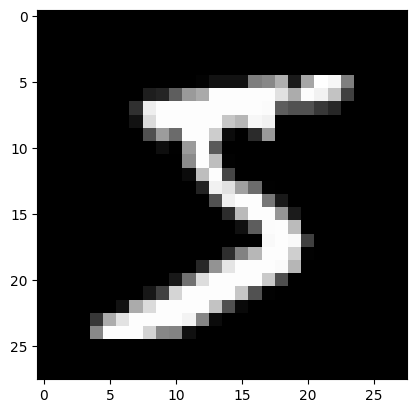

In [21]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(imgs[0]);

In [22]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

# Matrix Multiplication

In [23]:
torch.set_printoptions(linewidth = 140, precision =4)

In [24]:
# let's make up some fake data to work with. 

# set the manual seed 
torch.manual_seed(42)

# torch.randn creates a torch of argument size with random elements having a mean of 0 and variance of 1
# N.B. fix this in your flashcards. I mistakenly thought this function produced random elements between 0 and 1. 

# choose a size of 784 by 10 to represent 784 inputs and 10 outputs 
weights = torch.randn(784,10)

# 1 rank tensor (vector) filled with ten zeros for the bias
bias = torch.zeros(10)

In [25]:
weights

tensor([[ 1.9269,  1.4873,  0.9007,  ..., -1.6047, -0.7521,  1.6487],
        [-0.3925, -1.4036, -0.7279,  ..., -0.1596, -0.4974,  0.4396],
        [-0.7581,  1.0783,  0.8008,  ...,  1.3347, -0.2316,  0.0418],
        ...,
        [-0.0560, -0.4547,  1.2942,  ...,  1.1133,  2.1901,  0.3531],
        [ 0.4474,  0.7192, -1.9300,  ..., -0.8714,  0.2235,  0.2528],
        [ 0.2169,  0.4700,  0.3268,  ...,  0.0470,  0.5487, -1.9951]])

In [26]:
bias

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
m1 = x_train[0:5]

So, we want to be able to do 
tns@weights = product. 

I know, from my studies, that in matrix multiplication every element in the product matrix is the **dot product** of a row in the first matrix and a column in the second matrix. 

In other words, 

1. for each row **i** in the first matrix
2. for each column **k** in the second matrix 
4. for each column **j** in the first matrix
5. multiply the element (i,j) by (j,k)
6. iteratively add products together
7. j++
8. k++
9. i++

In [28]:
# Original Example to Compare To
res = m1@weights 
res

tensor([[ -4.5013,   8.5536,   5.6343,  -6.6547,   0.4884,  -0.0259, -15.6443,  -1.5296,  14.5242,   9.7703],
        [-13.3019,  -3.8749,   4.1859,   7.0026,   2.1013,   6.7690,  -6.7711,  -1.5963,  -0.9764,  12.6805],
        [ -6.5032,  -8.1261,   4.2241,  -6.5426, -11.3820,   9.3290, -21.8505,  -0.3382,   0.4698,   8.9912],
        [ -8.9549,  22.6746,   0.2045,  10.6220,  -8.8288,   4.8835,  13.1432,   4.6022,  15.2993,   5.9771],
        [-19.4157,   5.0400,  -2.1355,  -3.2116, -16.8264,  11.2725,   1.1869,  -0.7417,   7.4023,   7.4249]])

In [29]:
# now let's look at our implementation
def matmul(a,b):
    
    # deconstruct rows and columns of the two elements
    ar, ac = a.shape
    br, bc = b.shape

    # create a blank tensor of correct size to put values into 
    prod = torch.zeros((ar,bc))

    # loop through tensors to compute dot products
    for i in range(ar): 
        for k in range(bc):
            for j in range(ac): 
                prod[i,k]+= a[i,j]*b[j,k]
            
    return prod

In [30]:
res2 = matmul(m1, weights)
res2

tensor([[ -4.5013,   8.5536,   5.6343,  -6.6547,   0.4884,  -0.0259, -15.6443,  -1.5296,  14.5242,   9.7703],
        [-13.3019,  -3.8749,   4.1859,   7.0026,   2.1013,   6.7690,  -6.7711,  -1.5963,  -0.9764,  12.6805],
        [ -6.5032,  -8.1261,   4.2241,  -6.5426, -11.3820,   9.3290, -21.8505,  -0.3382,   0.4698,   8.9912],
        [ -8.9549,  22.6746,   0.2045,  10.6220,  -8.8288,   4.8835,  13.1432,   4.6022,  15.2993,   5.9771],
        [-19.4157,   5.0400,  -2.1355,  -3.2116, -16.8264,  11.2725,   1.1870,  -0.7417,   7.4023,   7.4249]])

In [31]:
if torch.equal(res,res2):
    print("equal")
else: print('not equal')

not equal


In [32]:
comp = (res == res2)
comp

tensor([[False,  True, False, False, False, False, False, False, False, False],
        [False, False, False,  True, False, False, False, False, False, False],
        [False, False,  True, False, False, False, False, False, False,  True],
        [False, False, False, False, False, False, False, False,  True, False],
        [ True, False, False, False, False, False, False, False, False, False]])

These *look* the same. Why does this print not equal? **floating point errors**

In [33]:
torch.set_printoptions(precision=7)

In [34]:
res

tensor([[ -4.5012999,   8.5535583,   5.6343098,  -6.6547408,   0.4884458,  -0.0259205, -15.6442547,  -1.5295603,  14.5241995,   9.7703285],
        [-13.3018723,  -3.8748703,   4.1859426,   7.0025721,   2.1012926,   6.7689848,  -6.7711048,  -1.5963006,  -0.9763577,  12.6805420],
        [ -6.5032082,  -8.1260672,   4.2241449,  -6.5425773, -11.3820400,   9.3289852, -21.8505344,  -0.3382134,   0.4697631,   8.9911814],
        [ -8.9548664,  22.6745567,   0.2045113,  10.6219511,  -8.8288002,   4.8834972,  13.1432276,   4.6022367,  15.2992592,   5.9771380],
        [-19.4157314,   5.0399828,  -2.1354804,  -3.2115545, -16.8263779,  11.2725430,   1.1869495,  -0.7416592,   7.4022536,   7.4249310]])

In [35]:
res2

tensor([[ -4.5012994,   8.5535583,   5.6343102,  -6.6547379,   0.4884455,  -0.0259189, -15.6442585,  -1.5295589,  14.5241976,   9.7703266],
        [-13.3018637,  -3.8748665,   4.1859431,   7.0025721,   2.1012936,   6.7689834,  -6.7711039,  -1.5962999,  -0.9763576,  12.6805439],
        [ -6.5032077,  -8.1260710,   4.2241449,  -6.5425754, -11.3820343,   9.3289824, -21.8505325,  -0.3382136,   0.4697638,   8.9911814],
        [ -8.9548655,  22.6745605,   0.2045134,  10.6219521,  -8.8288021,   4.8834968,  13.1432247,   4.6022363,  15.2992592,   5.9771376],
        [-19.4157314,   5.0399814,  -2.1354825,  -3.2115531, -16.8263817,  11.2725439,   1.1869512,  -0.7416589,   7.4022532,   7.4249315]])

My tensors aren't equal past 5 digits of precision. That can be seen if you change the printing options. 

Therefore, I should adjust the atol (absolute tolerance) parameter of .allclose() so that it can work at the level I need. My implementation generally looks right though. 


In [36]:
if torch.allclose(res,res2, atol = 1e-2):
    print("equal")
else: print('not equal')

equal


It works!

Next: time this implementation and try to make it faster. 

Notice this implementation doesn't report errors for matrices that aren't of compatible size. 

I suppose we're not supposed to worry about that for now. 

In [37]:
%timeit _ = matmul(m1, weights)

673 ms ± 39.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This takes about 6/10s a second. 

In [38]:
%timeit -n 50 _ = m1@weights

The slowest run took 18.63 times longer than the fastest. This could mean that an intermediate result is being cached.
17.1 µs ± 24 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


The Pytorch version takes four micro seconds. On to the next implementation. 

## Numba - Compiling python operations into C

The idea here is to take the code happening in the last part of the *for* loop and translate it into c code that will be executed faster by the CPU. The last part of the matmul code is the dot product

In [39]:
from numba import njit

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [40]:
@njit
def dot(a,b):
    res = 0
    for i in range(len(a)):
        res += a[i]*b[i]
    return res

In [41]:
from numpy import array

In [42]:
%timeit dot(array([1.,2,3]),array([2.,3,4]))

The slowest run took 10.00 times longer than the fastest. This could mean that an intermediate result is being cached.
3.61 µs ± 4.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
def matmul(a,b):
    
    # deconstruct rows and columns of the two elements
    ar, ac = a.shape
    br, bc = b.shape

    # create a blank tensor of correct size to put values into 
    prod = torch.zeros((ar,bc))

    # loop through tensors to compute dot products
    for i in range(ar): 
        for k in range(bc):
                prod[i,k]+= dot(a[i,:], b[:,k])
    return prod

Apparently numba can't handle tensors.

In [44]:
t1 = m1
t2 = weights
p = t1@t2
p

tensor([[ -4.5012999,   8.5535583,   5.6343098,  -6.6547408,   0.4884458,  -0.0259205, -15.6442547,  -1.5295603,  14.5241995,   9.7703285],
        [-13.3018723,  -3.8748703,   4.1859426,   7.0025721,   2.1012926,   6.7689848,  -6.7711048,  -1.5963006,  -0.9763577,  12.6805420],
        [ -6.5032082,  -8.1260672,   4.2241449,  -6.5425773, -11.3820400,   9.3289852, -21.8505344,  -0.3382134,   0.4697631,   8.9911814],
        [ -8.9548664,  22.6745567,   0.2045113,  10.6219511,  -8.8288002,   4.8834972,  13.1432276,   4.6022367,  15.2992592,   5.9771380],
        [-19.4157314,   5.0399828,  -2.1354804,  -3.2115545, -16.8263779,  11.2725430,   1.1869495,  -0.7416592,   7.4022536,   7.4249310]])

In [45]:
try: 
    t1 = t1.numpy()
    t2 = t2.numpy()

except:
    
    print('not tensors')

p2 = matmul(t1,t2)
p2

tensor([[ -4.5013008,   8.5535574,   5.6343107,  -6.6547399,   0.4884453,  -0.0259182, -15.6442537,  -1.5295594,  14.5241985,   9.7703276],
        [-13.3018703,  -3.8748701,   4.1859431,   7.0025730,   2.1012928,   6.7689857,  -6.7711039,  -1.5963007,  -0.9763575,  12.6805429],
        [ -6.5032072,  -8.1260691,   4.2241464,  -6.5425763, -11.3820391,   9.3289843, -21.8505344,  -0.3382128,   0.4697638,   8.9911814],
        [ -8.9548655,  22.6745567,   0.2045128,  10.6219540,  -8.8288012,   4.8834977,  13.1432238,   4.6022372,  15.2992592,   5.9771371],
        [-19.4157314,   5.0399828,  -2.1354818,  -3.2115545, -16.8263798,  11.2725439,   1.1869509,  -0.7416600,   7.4022532,   7.4249315]])

In [46]:
%timeit -n 50 _ = matmul(t1,t2)

974 µs ± 546 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


With *just that one* change, we are now a 100x faster. 1 ms vs. 600. wow. 

## Elementwise Opps 

Here we're replacing the dot product with an element-wise operation

In [47]:
def matmul(a,b):
    
    # deconstruct rows and columns of the two elements
    ar, ac = a.shape
    br, bc = b.shape

    # create a blank tensor of correct size to put values into 
    prod = torch.zeros((ar,bc))

    # loop through tensors to compute dot products
    for i in range(ar): 
        for k in range(bc):
                prod[i,k] = (a[i,:]*b[:,k]).sum()
    return prod

In [48]:
%timeit -n 50 _=matmul(m1,weights)

1 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


This is **much faster** than the original, but *slightly* slower than numba

## Broadcasting

Trying to grok *stride*

In [49]:
weights

tensor([[ 1.9269153,  1.4872841,  0.9007172,  ..., -1.6046669, -0.7521353,  1.6487230],
        [-0.3924786, -1.4036071, -0.7278813,  ..., -0.1595975, -0.4973975,  0.4395893],
        [-0.7581311,  1.0783176,  0.8008006,  ...,  1.3347378, -0.2316243,  0.0417595],
        ...,
        [-0.0559561, -0.4546973,  1.2942348,  ...,  1.1132715,  2.1900945,  0.3530664],
        [ 0.4473948,  0.7191662, -1.9299877,  ..., -0.8713886,  0.2234731,  0.2528359],
        [ 0.2168896,  0.4699849,  0.3267546,  ...,  0.0470233,  0.5487117, -1.9950601]])

In [50]:
weights.stride(), weights.shape

((10, 1), torch.Size([784, 10]))

In [51]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]])
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

This should have a stride of (3,1)

In [52]:
m.stride()

(3, 1)

In [53]:
def matmul(a,b):
    ar,ac = a.shape
    br, bc = b.shape

    c = torch.zeros(ar,bc)

    for i in range(ar): 
        c[i] = (a[i,:,None]*b).sum(dim=0)

    return c

I'm confused why the none needs to go here

In [54]:
m1[1,:].shape, weights.shape

(torch.Size([784]), torch.Size([784, 10]))

In [55]:
tns = matmul(m1, weights)
tns

tensor([[ -4.5013008,   8.5535574,   5.6343107,  -6.6547394,   0.4884448,  -0.0259187, -15.6442528,  -1.5295591,  14.5241985,   9.7703285],
        [-13.3018723,  -3.8748713,   4.1859436,   7.0025716,   2.1012931,   6.7689867,  -6.7711039,  -1.5963008,  -0.9763570,  12.6805429],
        [ -6.5032072,  -8.1260691,   4.2241464,  -6.5425758, -11.3820400,   9.3289852, -21.8505325,  -0.3382132,   0.4697628,   8.9911814],
        [ -8.9548655,  22.6745567,   0.2045126,  10.6219540,  -8.8288012,   4.8834977,  13.1432238,   4.6022367,  15.2992592,   5.9771371],
        [-19.4157314,   5.0399828,  -2.1354823,  -3.2115543, -16.8263798,  11.2725439,   1.1869512,  -0.7416601,   7.4022532,   7.4249306]])

In [56]:
m1@weights

tensor([[ -4.5012999,   8.5535583,   5.6343098,  -6.6547408,   0.4884458,  -0.0259205, -15.6442547,  -1.5295603,  14.5241995,   9.7703285],
        [-13.3018723,  -3.8748703,   4.1859426,   7.0025721,   2.1012926,   6.7689848,  -6.7711048,  -1.5963006,  -0.9763577,  12.6805420],
        [ -6.5032082,  -8.1260672,   4.2241449,  -6.5425773, -11.3820400,   9.3289852, -21.8505344,  -0.3382134,   0.4697631,   8.9911814],
        [ -8.9548664,  22.6745567,   0.2045113,  10.6219511,  -8.8288002,   4.8834972,  13.1432276,   4.6022367,  15.2992592,   5.9771380],
        [-19.4157314,   5.0399828,  -2.1354804,  -3.2115545, -16.8263779,  11.2725430,   1.1869495,  -0.7416592,   7.4022536,   7.4249310]])

Nice! 

In [57]:
%timeit -n 50 _=matmul(m1,weights)

173 µs ± 105 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


Nice! .0003 seconds! 

## Einstein Summation

Einstein summation (einsum) is a compact representation for combining products and sums in a general way. The key rules are:

* Repeating letters between input arrays means that values along those axes will be multiplied together.
* Omitting a letter from the output means that values along that axis will be summed.

In [58]:
m2 = weights

In [60]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [63]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [66]:
mr.sum(1)

tensor([[ -4.5013008,   8.5535574,   5.6343107,  -6.6547394,   0.4884448,  -0.0259187, -15.6442528,  -1.5295591,  14.5241985,   9.7703285],
        [-13.3018723,  -3.8748713,   4.1859436,   7.0025716,   2.1012931,   6.7689867,  -6.7711039,  -1.5963008,  -0.9763570,  12.6805429],
        [ -6.5032072,  -8.1260691,   4.2241464,  -6.5425758, -11.3820400,   9.3289852, -21.8505325,  -0.3382132,   0.4697628,   8.9911814],
        [ -8.9548655,  22.6745567,   0.2045126,  10.6219540,  -8.8288012,   4.8834977,  13.1432238,   4.6022367,  15.2992592,   5.9771371],
        [-19.4157314,   5.0399828,  -2.1354823,  -3.2115543, -16.8263798,  11.2725439,   1.1869512,  -0.7416601,   7.4022532,   7.4249306]])

In [67]:
mr = torch.einsum('ik,kj-> ij', m1,m2)
mr

tensor([[ -4.5012999,   8.5535583,   5.6343098,  -6.6547408,   0.4884458,  -0.0259205, -15.6442547,  -1.5295603,  14.5241995,   9.7703285],
        [-13.3018723,  -3.8748703,   4.1859426,   7.0025721,   2.1012926,   6.7689848,  -6.7711048,  -1.5963006,  -0.9763577,  12.6805420],
        [ -6.5032082,  -8.1260672,   4.2241449,  -6.5425773, -11.3820400,   9.3289852, -21.8505344,  -0.3382134,   0.4697631,   8.9911814],
        [ -8.9548664,  22.6745567,   0.2045113,  10.6219511,  -8.8288002,   4.8834972,  13.1432276,   4.6022367,  15.2992592,   5.9771380],
        [-19.4157314,   5.0399828,  -2.1354804,  -3.2115545, -16.8263779,  11.2725430,   1.1869495,  -0.7416592,   7.4022536,   7.4249310]])

In [76]:
def matmul(a,b): return torch.einsum('ik, kj-> ij', a,b)

In [77]:
product = matmul(m1,m2)

In [78]:
product

tensor([[ -4.5012999,   8.5535583,   5.6343098,  -6.6547408,   0.4884458,  -0.0259205, -15.6442547,  -1.5295603,  14.5241995,   9.7703285],
        [-13.3018723,  -3.8748703,   4.1859426,   7.0025721,   2.1012926,   6.7689848,  -6.7711048,  -1.5963006,  -0.9763577,  12.6805420],
        [ -6.5032082,  -8.1260672,   4.2241449,  -6.5425773, -11.3820400,   9.3289852, -21.8505344,  -0.3382134,   0.4697631,   8.9911814],
        [ -8.9548664,  22.6745567,   0.2045113,  10.6219511,  -8.8288002,   4.8834972,  13.1432276,   4.6022367,  15.2992592,   5.9771380],
        [-19.4157314,   5.0399828,  -2.1354804,  -3.2115545, -16.8263779,  11.2725430,   1.1869495,  -0.7416592,   7.4022536,   7.4249310]])

In [79]:
%timeit -n 50 _=matmul(m1,m2)

45.1 µs ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


Even faster than broadcasting! we can do the whole thing now

In [80]:
%timeit -n 5 _= matmul(x_train, weights)

9.32 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [81]:
%timeit -n 5 _=x_train@weights

8.38 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
